In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
df=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

In [3]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [5]:
df.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [6]:
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


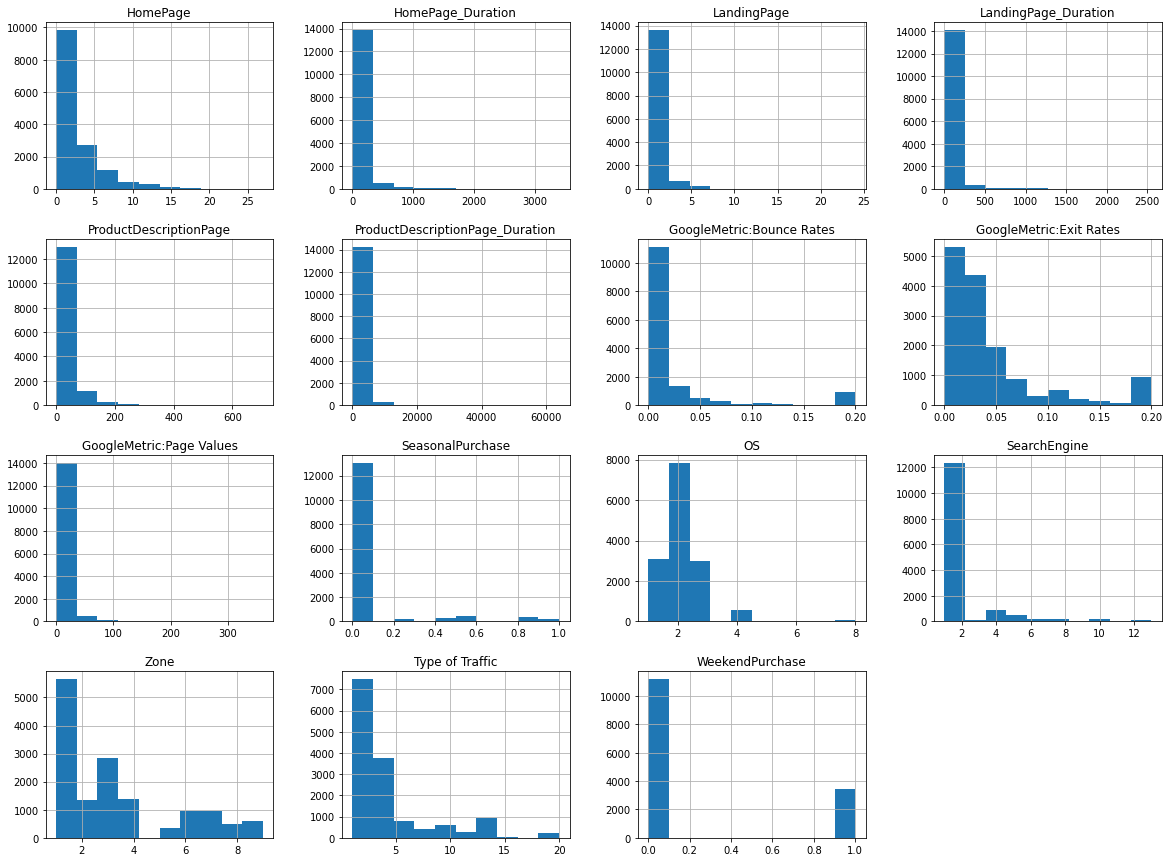

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax);

In [8]:
X=df.drop(['Made_Purchase'], axis=1)
Y=df['Made_Purchase']


In [9]:
num_att = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase' ]
cat_att = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [11]:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'mean')),
                     ('scaler', StandardScaler())])
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')),
                     ('encoder', OneHotEncoder())])

pipe = ColumnTransformer([('num', num_pipe, num_att),
                          ('cat', cat_pipe, cat_att)
                          ])
X = pipe.fit_transform(X)

In [12]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,1.473100e+04,...,14731.000000,14731.000000,14731.000000,14731.000000,14731.00000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,5.981081e-17,2.845837e-17,1.447036e-17,8.682214e-18,-2.122319e-17,-5.305797e-17,5.595204e-17,3.858762e-18,3.858762e-17,2.894071e-17,...,0.322857,0.346752,0.330392,0.247980,0.25056,0.239291,0.262168,0.321092,0.344987,0.333922
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,0.467584,0.475952,0.470370,0.431855,0.43335,0.426665,0.439829,0.466912,0.475380,0.471628
min,-6.879765e-01,-4.443790e-01,-3.939110e-01,-2.398313e-01,-7.059068e-01,-5.927644e-01,-4.696498e-01,-8.988266e-01,-2.862788e-01,-3.179656e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.879765e-01,-4.443790e-01,-3.939110e-01,-2.398313e-01,-5.493343e-01,-5.036755e-01,-4.696498e-01,-6.036727e-01,-2.862788e-01,-3.179656e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.822418e-01,-4.107567e-01,-3.939110e-01,-2.398313e-01,-3.032918e-01,-2.960496e-01,-3.952063e-01,-3.621832e-01,-2.862788e-01,-3.179656e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.292276e-01,5.995550e-02,-3.939110e-01,-2.398313e-01,1.216906e-01,1.181254e-01,-9.379299e-02,1.073798e-01,-2.862788e-01,-3.179656e-01,...,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,7.566860e+00,1.860125e+01,1.887062e+01,1.803554e+01,1.506318e+01,3.142594e+01,3.550300e+00,3.125999e+00,2.123324e+01,4.643782e+00,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X_osam, y_osam = sampler.fit_resample(X, Y) 
X_osam.shape

(18130, 41)

In [14]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier, StackingClassifier
model = GradientBoostingClassifier()
model.fit(X_osam,y_osam)

GradientBoostingClassifier()

In [15]:
model.score(X_osam,y_osam)

0.7318257032542747

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_osam,y_osam)

array([0.30860452, 0.47683398, 0.39492554, 0.46194153, 0.77054606])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_osam),y_osam))

              precision    recall  f1-score   support

       False       0.91      0.67      0.77     12275
        True       0.55      0.86      0.67      5855

    accuracy                           0.73     18130
   macro avg       0.73      0.77      0.72     18130
weighted avg       0.79      0.73      0.74     18130



In [18]:
dft=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [19]:
X_test = pipe.transform(dft)

In [20]:
prediction=model.predict(X_test)

In [21]:
p=pd.DataFrame(prediction)
p[0].value_counts()
X_test = pipe.transform(dft)

In [22]:
submission=pd.DataFrame(columns=['id','Made_Purchase'])
submission['id']=[i for i in range(len(prediction))]
submission['Made_Purchase']=prediction
submission.to_csv('submission.csv',index=False)

In [23]:
submission.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
